## Import Required Libraries

In [28]:
import numpy as np
import pandas as pd
import sklearn as sk
import tensorflow as tf
import keras 
# as k
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from os import path
import warnings
from keras.wrappers.scikit_learn import KerasClassifier
# from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

warnings.filterwarnings("ignore")

## Library Versions

In [3]:
print("Numpy version ",np.version.version)
print("Pandas version",pd.__version__)
print("Sklearn version",sk.__version__)
print("Keras version", keras.__version__)
print("Tensorflow version ",tf.__version__)
if tf.test.gpu_device_name():
    print('GPU: {}'.format(tf.test.gpu_device_name()))
else:
    print('CPU')

Numpy version  1.21.6
Pandas version 1.3.5
Sklearn version 1.0.2
Keras version 2.3.1
Tensorflow version  1.15.5
CPU


In [4]:
# setting the seed
np.random.seed(7)
tf.set_random_seed(7)

## Loading the data

In [5]:
# Specify the fields with their names
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

df = pd.read_csv("DATA/pima_diabetes.csv", names=names)

df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Exploratory Data Analysis

In [6]:
# shape of the dataset
df.shape

(768, 9)

In [7]:
# Column or feild names in the dataset
df.columns

Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')

In [8]:
# Summary of the dataset
df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
# classes in the dataset
df['class'].unique()

array([1, 0])

In [11]:
df['class'].value_counts()

0    500
1    268
Name: class, dtype: int64

In [12]:
#checking for null values
df.isnull().sum()

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

## Visualization

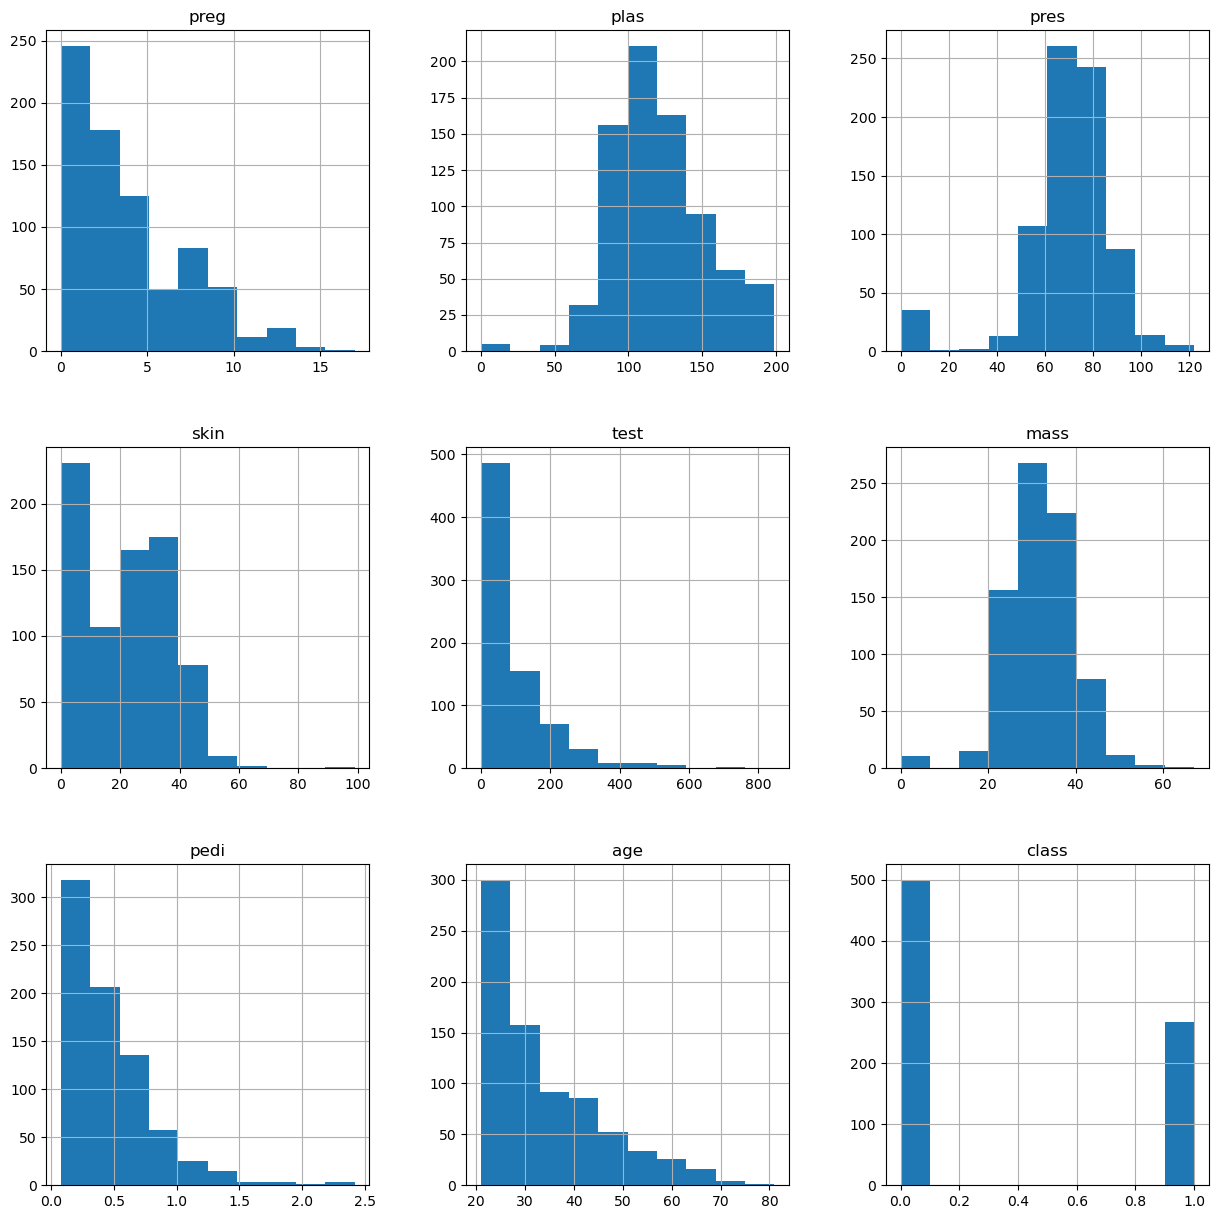

In [13]:
# using histogram
df.hist(figsize=(15,15))
plt.show()

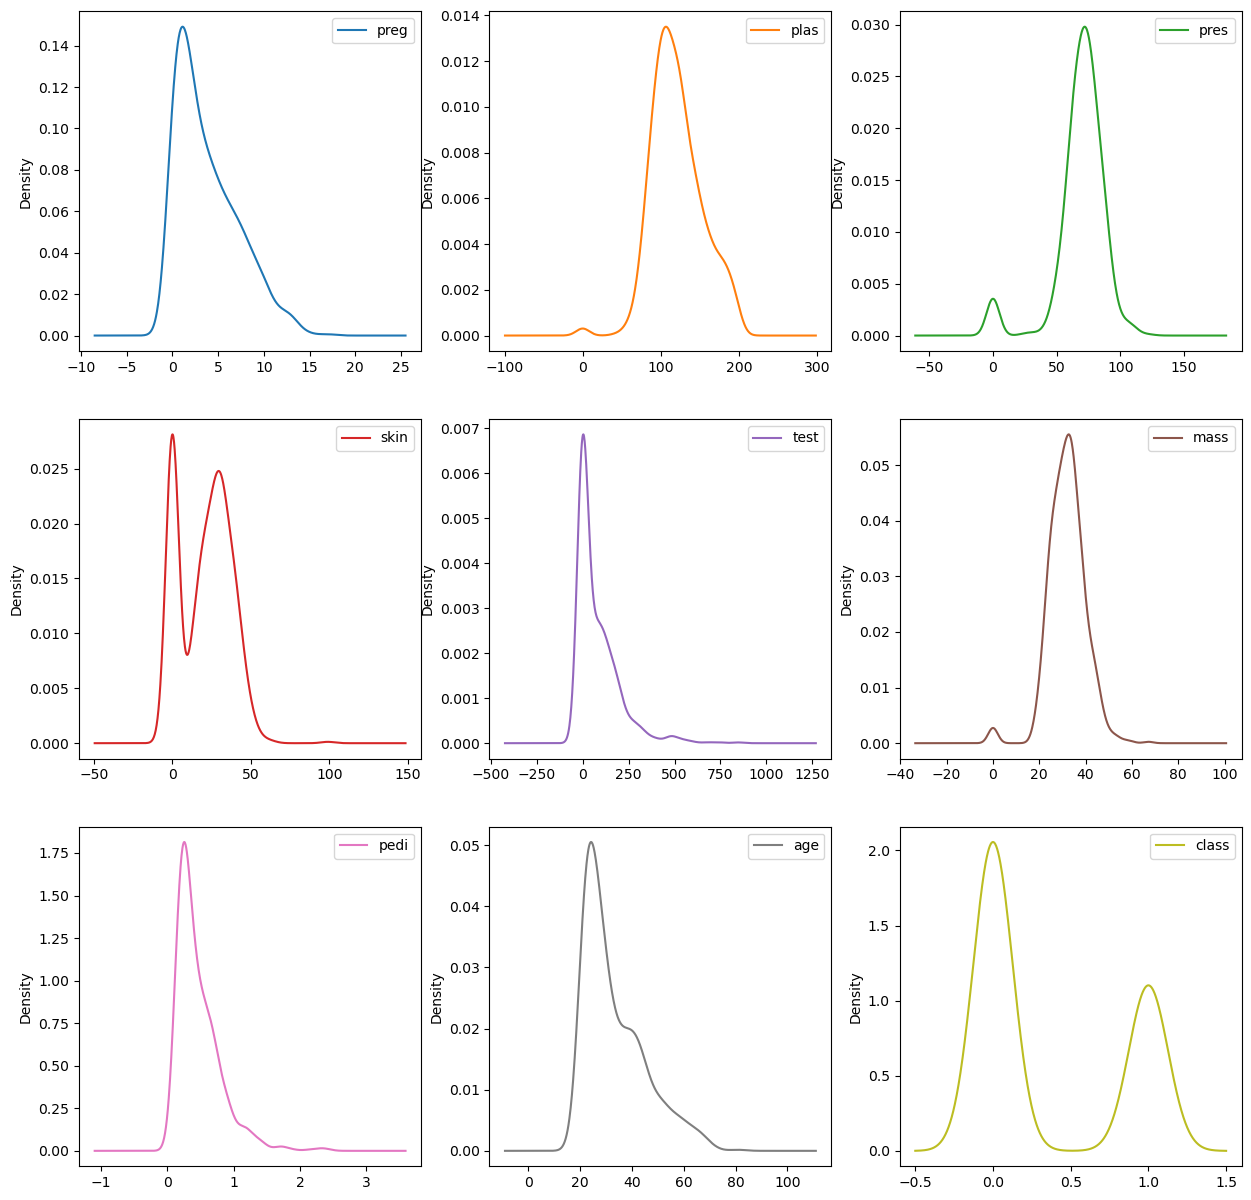

In [14]:
#using density plot
df.plot(kind='density',subplots=True,layout=(3,3),sharex=False,legend=True,figsize=(15,15))
plt.show()

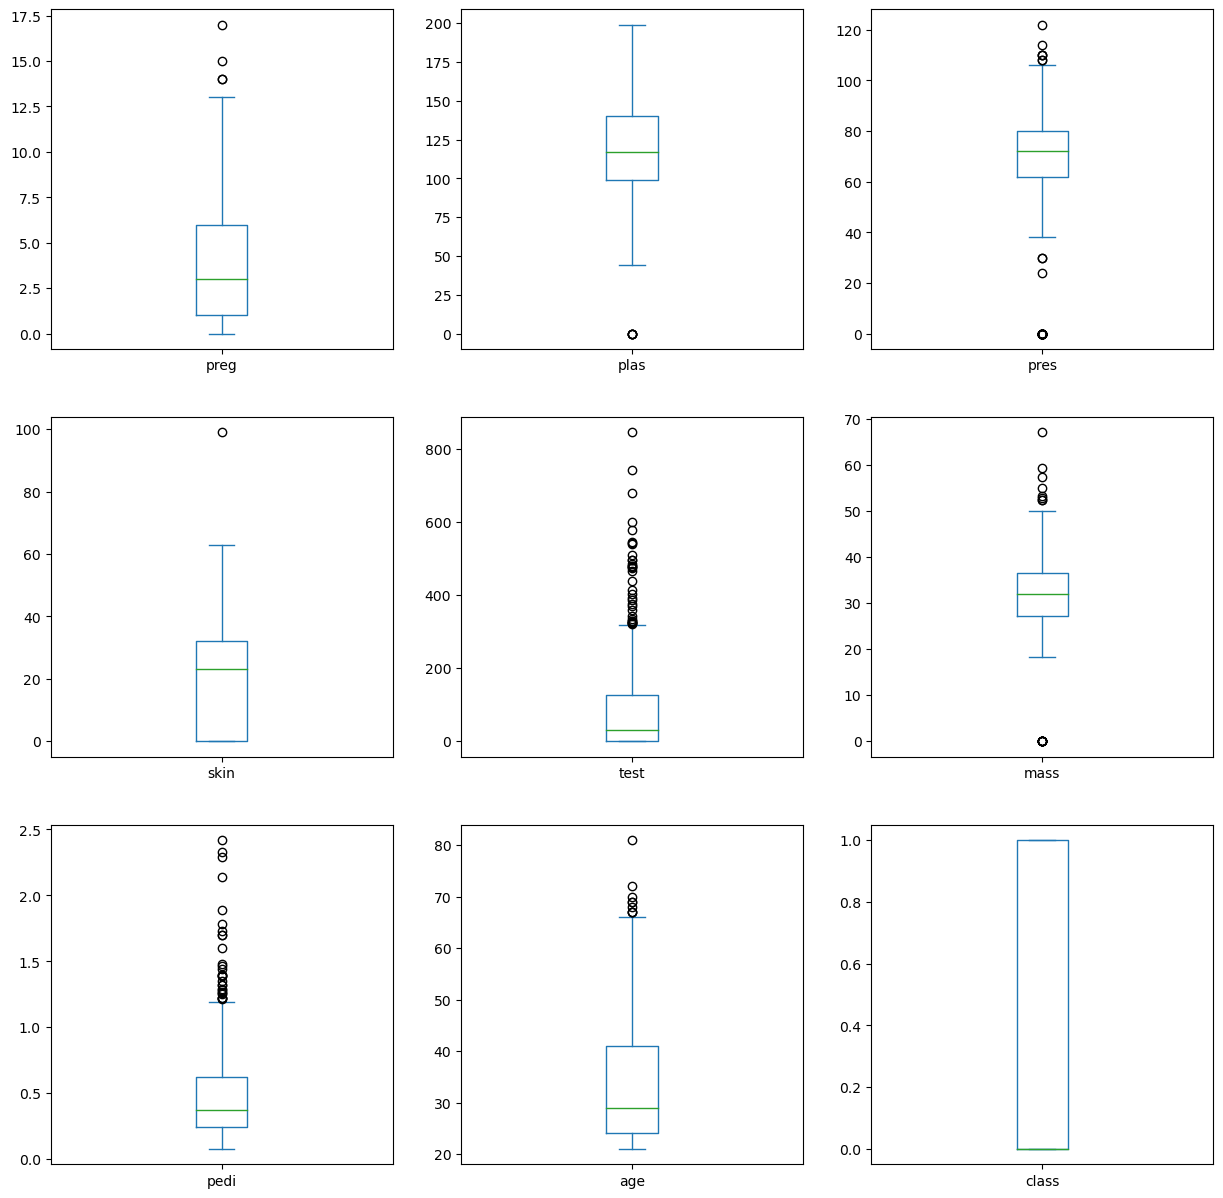

In [15]:
#using box plot
df.plot(kind='box',subplots=True,layout=(3,3),sharex=False,legend=True,figsize=(15,15))
plt.show()

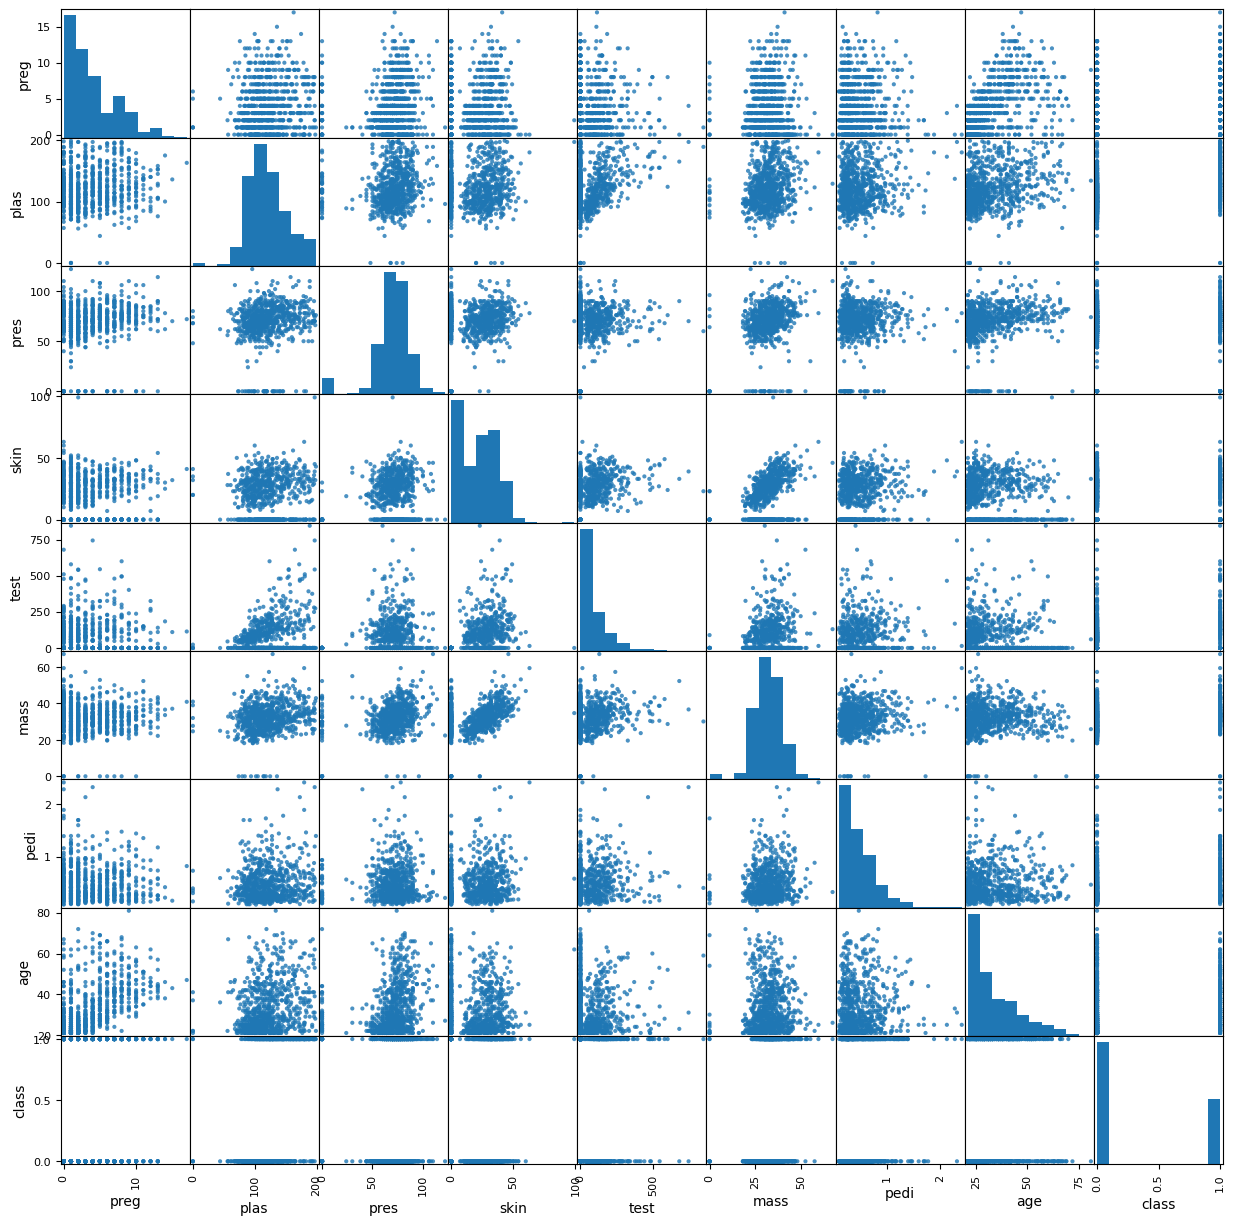

In [16]:
# Using Scatter matrix
scatter_matrix(df,alpha=0.8,figsize=(15,15))
plt.show()

## Splitting the data into input and output arrays

In [17]:
data=df.values
#Input numpy array
X=data[:,0:8]
#Output numpy array
Y=data[:,8]

## Splitting the data into train, val, test datasets

In [18]:
X_train, X_test_val, Y_train, Y_test_val = train_test_split(X, Y,test_size=0.33, random_state=7)
X_val, X_test, Y_val, Y_test = train_test_split(X_test_val, Y_test_val,test_size=0.33, random_state=7)

## Sequential model of Keras

In [23]:
from keras.models import Sequential
from keras.layers import Dense
def model_sequential():
    model = Sequential()
    model.add(Dense(16, input_dim=8,activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

## Training the model

In [24]:
model= model_sequential()
history = model.fit(X_train,Y_train, epochs=250,batch_size=10,validation_data=(X_val, Y_val))

Train on 514 samples, validate on 170 samples
Epoch 1/250
514/514 [==============================] - 1s 2ms/step - loss: 1.1419 - accuracy: 0.6051 - val_loss: 1.0740 - val_accuracy: 0.5824
Epoch 2/250
514/514 [==============================] - 0s 381us/step - loss: 0.9205 - accuracy: 0.6479 - val_loss: 0.9262 - val_accuracy: 0.5941
Epoch 3/250
514/514 [==============================] - 0s 431us/step - loss: 0.7885 - accuracy: 0.6362 - val_loss: 0.9308 - val_accuracy: 0.5824
Epoch 4/250
514/514 [==============================] - 0s 415us/step - loss: 0.7335 - accuracy: 0.6420 - val_loss: 0.8116 - val_accuracy: 0.6235
Epoch 5/250
514/514 [==============================] - 0s 436us/step - loss: 0.6874 - accuracy: 0.6537 - val_loss: 0.7758 - val_accuracy: 0.6471
Epoch 6/250
514/514 [==============================] - 0s 400us/step - loss: 0.6676 - accuracy: 0.6712 - val_loss: 0.7577 - val_accuracy: 0.6294
Epoch 7/250
514/514 [==============================] - 0s 407us/step - loss: 0.6532 - 

## Training loss and accuracy

training accuracy :  0.82684827
validation accuracy :  0.7529411911964417


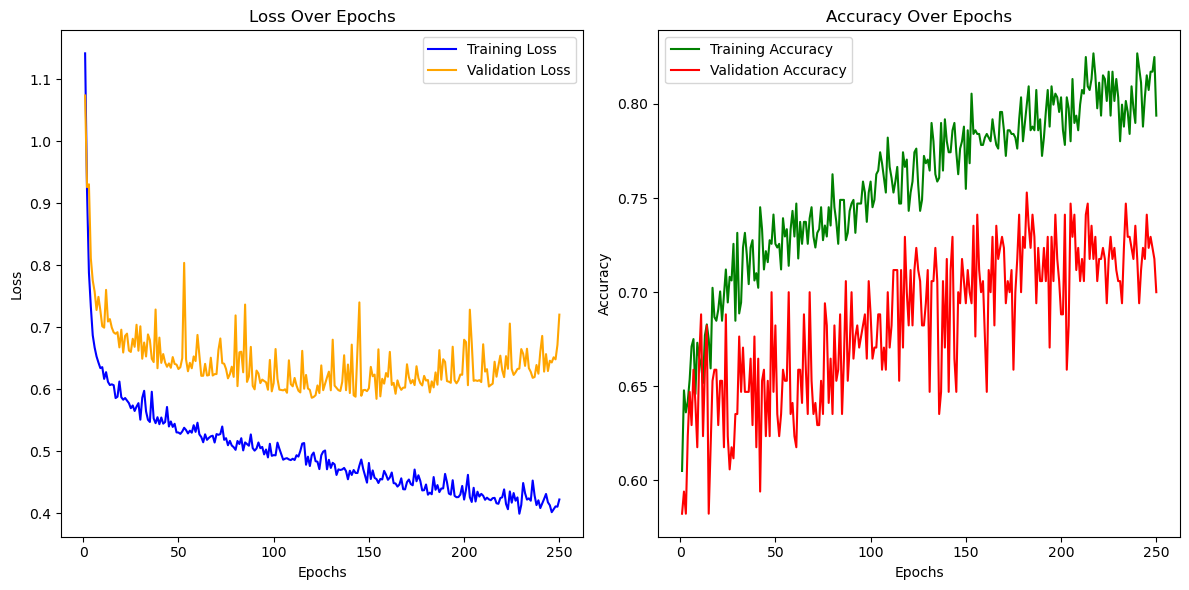

In [25]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
print("training accuracy : ",max(training_accuracy))
print("validation accuracy : ",max(validation_accuracy))

epochs_range = range(1, len(training_loss) + 1)

plt.figure(figsize=(12, 6))

# Subplot for Loss
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_loss, label='Training Loss', color='blue')
plt.plot(epochs_range, validation_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()

# Subplot for Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy',color='green')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy',color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()
plt.tight_layout()
plt.show()


## Accuracy of the model

In [31]:
score = model.evaluate(X_test, Y_test)
# print(model.metrics_names[1], score[1]*100)
print(model.metrics_names[1]," : ",score[1])

84/84 [==============================] - 0s 77us/step
accuracy  :  0.6666666865348816


## Evaluate the model using the 10-fold cross-validation technique

In [29]:
keras_classifier = KerasClassifier(build_fn = model_sequential, epochs =250, batch_size = 10)

In [30]:
K = 10
fold = KFold(n_splits=K,shuffle=True,random_state=7)
val_score = cross_val_score(keras_classifier,X,Y,cv=fold)
print("Effectiveness of the model : ",val_score.mean())

Epoch 1/250
691/691 [==============================] - 1s 1ms/step - loss: 8.5629 - accuracy: 0.5514
Epoch 2/250
691/691 [==============================] - 0s 297us/step - loss: 1.5220 - accuracy: 0.4906
Epoch 3/250
691/691 [==============================] - 0s 309us/step - loss: 0.9778 - accuracy: 0.5716
Epoch 4/250
691/691 [==============================] - 0s 315us/step - loss: 0.8517 - accuracy: 0.6020
Epoch 5/250
691/691 [==============================] - 0s 315us/step - loss: 0.7886 - accuracy: 0.6411
Epoch 6/250
691/691 [==============================] - 0s 293us/step - loss: 0.7377 - accuracy: 0.6339
Epoch 7/250
691/691 [==============================] - 0s 280us/step - loss: 0.7293 - accuracy: 0.6266
Epoch 8/250
691/691 [==============================] - 0s 291us/step - loss: 0.6802 - accuracy: 0.6556
Epoch 9/250
691/691 [==============================] - 0s 288us/step - loss: 0.6927 - accuracy: 0.6411
Epoch 10/250
691/691 [==============================] - 0s 286us/step - los